In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats
from operator import add

In [2]:
gainPath = '/home/marteswong/CCD/CCD gain 3b/'
gain_bias = 'bias_0_230915-160629.dat'

In [3]:
data_df = pd.read_csv(gainPath + gain_bias, delimiter=' ')
bias_array = np.array(data_df)[430:530, 590:690]
print(bias_array)
C_b = np.mean(bias_array)
var_b = np.std(bias_array) **2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
# Compute the mean signal of ROI from the bias-subtracted images
paper = np.arange(10)
mean = []
mean_a = []
mean_b = []
data_dec_a = np.zeros((100,100))
data_dec_b = np.zeros((100,100))
ratio = []
count = 0


for n in paper:
    data_df_a = pd.read_csv(gainPath + "{}a_0.dat".format(n), delimiter=' ')
    data_array_a = np.array(data_df_a)[430:530, 590:690]

    data_df_b = pd.read_csv(gainPath + "{}b_0.dat".format(n), delimiter=' ')
    data_array_b = np.array(data_df_b)[430:530, 590:690]

    for i in range(len(data_array_a)):
        for j in range(len(data_array_a[i])):
            t_a = data_array_a[i][j]
            d_a = int(str(t_a), base=16)
            data_dec_a[i][j] = d_a

            t_b = data_array_b[i][j]
            d_b = int(str(t_b), base=16)
            data_dec_b[i][j] = d_b
    net_data_dec_a = np.subtract(data_dec_a, bias_array)
    net_data_dec_b = np.subtract(data_dec_b, bias_array)

    mean_a.append(np.mean(net_data_dec_a))
    mean_b.append(np.mean(net_data_dec_b))

    mean.append( (np.mean(net_data_dec_a) + np.mean(net_data_dec_b))/2.0 )

    count += 1

/tmp/ipykernel_14423/2801696128.py:13: DtypeWarning: Columns (237) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_a = pd.read_csv(gainPath + "{}a_0.dat".format(n), delimiter=' ')
/tmp/ipykernel_14423/2801696128.py:13: DtypeWarning: Columns (1117,1141,1156,1165,1171,1180,1211,1223,1229,1231,1234,1247,1255,1258,1260,1263,1267,1270,1271,1273,1274,1275,1277,1279) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_a = pd.read_csv(gainPath + "{}a_0.dat".format(n), delimiter=' ')
/tmp/ipykernel_14423/2801696128.py:16: DtypeWarning: Columns (1024,1076,1091,1100,1135,1149,1150,1153,1158,1166,1170,1171,1178,1179,1181,1182,1188,1189,1200,1203,1206,1208,1217,1218,1223,1224,1226,1227,1228,1231,1233,1234,1238,1239,1240,1241,1245,1246,1247,1249,1250,1251,1252,1254,1255,1257,1259,1260,1261,1262,1263,1264,1265,1267,1269,1270,1271,1273,1275,1276,1277,1278,1279) have mixed types. Specify dtype option on import or set low_memory=False.


In [5]:
print(mean_a)
print(mean_b)
print(mean)

[254.9972, 87.1599, 60.2146, 50.726, 40.8856, 34.4316, 33.3622, 27.6769, 28.696, 21.9459]
[254.9972, 87.3205, 59.9337, 49.7161, 40.509, 34.5342, 33.3701, 28.1396, 28.8817, 21.8603]
[254.9972, 87.24019999999999, 60.07415, 50.22105, 40.6973, 34.4829, 33.366150000000005, 27.908250000000002, 28.78885, 21.903100000000002]


In [6]:
ratio = list(map(lambda x, y: x / y, mean_a, mean_b))
print(ratio)


[1.0, 0.9981607984379384, 1.004686845631089, 1.0203133391396348, 1.0092966994988768, 0.9970290320899283, 0.9997632611229814, 0.9835569801987234, 0.9935703230765504, 1.003915774257444]


In [7]:
# Copmute the correct variance 
var = []
count = 0

for n in paper:
    data_df_a = pd.read_csv(gainPath + "{}a_0.dat".format(n), delimiter=' ')
    data_array_a = np.array(data_df_a)[430:530, 590:690]

    data_df_b = pd.read_csv(gainPath + "{}b_0.dat".format(n), delimiter=' ')
    data_array_b = np.array(data_df_b)[430:530, 590:690]

    for i in range(len(data_array_a)):
        for j in range(len(data_array_a[i])):
            t_a = data_array_a[i][j]
            d_a = int(str(t_a), base=16)
            data_dec_a[i][j] = d_a

            t_b = data_array_b[i][j]
            d_b = int(str(t_b), base=16)
            data_dec_b[i][j] = d_b * ratio[n]

    data_corr = np.subtract(data_dec_a, data_dec_b)
    var.append(np.std(data_corr)**2 /2)
    count += 1


/tmp/ipykernel_14423/226435969.py:6: DtypeWarning: Columns (237) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_a = pd.read_csv(gainPath + "{}a_0.dat".format(n), delimiter=' ')
/tmp/ipykernel_14423/226435969.py:6: DtypeWarning: Columns (1117,1141,1156,1165,1171,1180,1211,1223,1229,1231,1234,1247,1255,1258,1260,1263,1267,1270,1271,1273,1274,1275,1277,1279) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df_a = pd.read_csv(gainPath + "{}a_0.dat".format(n), delimiter=' ')
/tmp/ipykernel_14423/226435969.py:9: DtypeWarning: Columns (1024,1076,1091,1100,1135,1149,1150,1153,1158,1166,1170,1171,1178,1179,1181,1182,1188,1189,1200,1203,1206,1208,1217,1218,1223,1224,1226,1227,1228,1231,1233,1234,1238,1239,1240,1241,1245,1246,1247,1249,1250,1251,1252,1254,1255,1257,1259,1260,1261,1262,1263,1264,1265,1267,1269,1270,1271,1273,1275,1276,1277,1278,1279) have mixed types. Specify dtype option on import or set low_memory=False.
  data

In [8]:
print(var)

[0.0, 2.721291710912392, 2.0899454361524405, 1.8249727663562398, 1.450137025228807, 1.268920135410974, 1.2332289075241742, 1.0350999514775723, 1.0779661767187096, 0.8803914807715804]


In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(var[1:], mean[1:])
res = stats.linregress(var[1:], mean[1:])

x = [0.8803914807715804, 2.721291710912392]
y = [x[0]*slope+intercept, x[1]*slope + intercept]

In [10]:
print(var[1:])
print(mean[1:])

# fitting results from linear regression
print(slope)   # 34.11259112949131s
print(intercept)   # -8.737075508250783
print(std_err)   # 1.2193544318897918
print(res.intercept_stderr)  # 1.9638912489648854

[2.721291710912392, 2.0899454361524405, 1.8249727663562398, 1.450137025228807, 1.268920135410974, 1.2332289075241742, 1.0350999514775723, 1.0779661767187096, 0.8803914807715804]
[87.24019999999999, 60.07415, 50.22105, 40.6973, 34.4829, 33.366150000000005, 27.908250000000002, 28.78885, 21.903100000000002]
34.11259112949131
-8.737075508250783
1.2193544318897918
1.9638912489648854


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


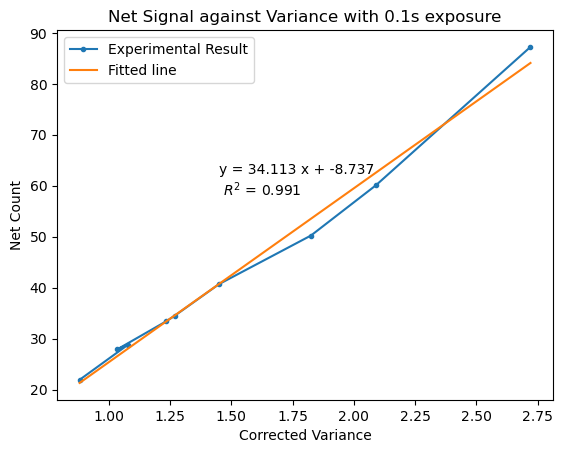

In [35]:
# Overplot the experimental data with the fitted line
# Display the equation obtained from linear regression on the plot
plt.plot(var[1:], mean[1:], marker = ".", label = "Experimental Result")
plt.plot(x, y, label = 'Fitted line')
plt.title("Net Signal against Variance with 0.1s exposure")
plt.xlabel("Corrected Variance")
plt.ylabel("Net Count")
plt.legend()

plt.text(1.45,58,"y = {:.3f} x + {:.3f}\n $R^2$ = {:.3f}".format(slope, intercept, r_value**2))
plt.savefig(gainPath + "exp3b.eps")